In [1]:
# Classifiers Models
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from lightgbm import LGBMClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFE,RFECV
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder,MinMaxScaler, PolynomialFeatures

from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, learning_curve,
cross_val_predict, cross_validate,permutation_test_score,validation_curve,StratifiedKFold,RandomizedSearchCV)

from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score, 
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc)

from sklearn.ensemble import (AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,
RandomForestClassifier,VotingClassifier,HistGradientBoostingClassifier)

In [2]:
df = pd.read_csv('adult-all.csv')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
df.columns

Index(['39', 'State-gov', '77516', 'Bachelors', '13', 'Never-married',
       'Adm-clerical', 'Not-in-family', 'White', 'Male', '2174', '0', '40',
       'United-States', '<=50K'],
      dtype='object')

In [8]:
# Rename columns
df.rename(columns={'39':'age', 'State-gov':'workclass', '77516':'fnlwgt', 'Bachelors':'education', '13':'education_num',
                   'Never-married':'marital_status', 'Adm-clerical':'occupation', 'Not-in-family':'relationship',
                   'White':'race', 'Male':'gender', '2174':'capital_gain', '0':'capital_loss',
                   '40':'hours_per_week', 'United-States':'country', '<=50K':'salary'}, inplace=True)

In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [6]:
def replace_dash_with_underscore(df):
    """
    Replace all dash characters (-) with underscores (_) in column names of a DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The DataFrame whose column names need to be modified.
    
    Returns:
    --------
    pandas.DataFrame
        A DataFrame with modified column names.
    """
    # Create a mapping of original column names to new column names
    column_mapping = {col: col.replace('-', '_') for col in df.columns}
    
    # Rename the columns using the mapping
    new_df = df.rename(columns=column_mapping)
    
    return new_df

In [10]:
df = df.map(lambda x: x.lower() if isinstance(x, str) else x)

In [18]:
# Replacing - whit _
df = df.map(lambda x: x.replace('-', '_') if isinstance(x, str) else x) 

In [19]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,salary
0,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k
1,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k
2,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k
3,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,284582,masters,14,married_civ_spouse,exec_managerial,wife,white,female,0,0,40,united_states,<=50k


In [20]:
df2 = df.copy()

In [22]:
# Replace ? with NaN values
df = df.replace('?', np.nan) 

In [27]:
# Dropna Values
df.dropna(subset=['workclass','occupation','country'], inplace=True)

In [24]:
df.select_dtypes(include=['object','category']).head(2)

,workclass,education,marital_status,occupation,relationship,race,gender,country,salary
0,self_emp_not_inc,bachelors,married_civ_spouse,exec_managerial,husband,white,male,united_states,<=50k
1,private,hs_grad,divorced,handlers_cleaners,not_in_family,white,male,united_states,<=50k


In [29]:
# Droping values 
df = df[df['race'] != 'other']
df = df[df['occupation'] != 'other_service']
df = df[df['relationship'] != 'other_relative']

In [31]:
# Droping values 
df = df[df['country'] != 'outlying_us(guam_usvi_etc)']

In [34]:
# Replace values 
df['country'] = df['country'].str.replace('trinadad&tobago', 'trinadad_and_tobago')

In [35]:
# Unique
objects = df.select_dtypes(include=['object','category'])
for col in objects.columns:
    #print(f"\n{col}:")
    print(f"{'='*127}")
    print(df[col].unique()) 

['self_emp_not_inc' 'private' 'state_gov' 'federal_gov' 'local_gov'
 'self_emp_inc' 'without_pay']
['bachelors' 'hs_grad' '11th' 'masters' 'some_college' 'assoc_acdm'
 '7th_8th' 'doctorate' '9th' 'assoc_voc' 'prof_school' '5th_6th' '10th'
 'preschool' '12th' '1st_4th']
['married_civ_spouse' 'divorced' 'never_married' 'married_af_spouse'
 'separated' 'widowed' 'married_spouse_absent']
['exec_managerial' 'handlers_cleaners' 'prof_specialty' 'adm_clerical'
 'sales' 'transport_moving' 'farming_fishing' 'machine_op_inspct'
 'tech_support' 'craft_repair' 'protective_serv' 'armed_forces'
 'priv_house_serv']
['husband' 'not_in_family' 'wife' 'own_child' 'unmarried']
['white' 'black' 'asian_pac_islander' 'amer_indian_eskimo']
['male' 'female']
['united_states' 'cuba' 'india' 'mexico' 'puerto_rico' 'honduras'
 'england' 'germany' 'iran' 'poland' 'columbia' 'cambodia' 'thailand'
 'ecuador' 'laos' 'taiwan' 'haiti' 'portugal' 'dominican_republic'
 'philippines' 'canada' 'el_salvador' 'guatemala' 'c

In [36]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,country,salary
0,50,self_emp_not_inc,83311,bachelors,13,married_civ_spouse,exec_managerial,husband,white,male,0,0,13,united_states,<=50k
1,38,private,215646,hs_grad,9,divorced,handlers_cleaners,not_in_family,white,male,0,0,40,united_states,<=50k
2,53,private,234721,11th,7,married_civ_spouse,handlers_cleaners,husband,black,male,0,0,40,united_states,<=50k
3,28,private,338409,bachelors,13,married_civ_spouse,prof_specialty,wife,black,female,0,0,40,cuba,<=50k
4,37,private,284582,masters,14,married_civ_spouse,exec_managerial,wife,white,female,0,0,40,united_states,<=50k


In [37]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
country           0
salary            0
dtype: int64

In [38]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 39037 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             39037 non-null  int64 
 1   workclass       39037 non-null  object
 2   fnlwgt          39037 non-null  int64 
 3   education       39037 non-null  object
 4   education_num   39037 non-null  int64 
 5   marital_status  39037 non-null  object
 6   occupation      39037 non-null  object
 7   relationship    39037 non-null  object
 8   race            39037 non-null  object
 9   gender          39037 non-null  object
 10  capital_gain    39037 non-null  int64 
 11  capital_loss    39037 non-null  int64 
 12  hours_per_week  39037 non-null  int64 
 13  country         39037 non-null  object
 14  salary          39037 non-null  object
dtypes: int64(6), object(9)
memory usage: 24.2 MB


In [40]:
df.to_csv('clean_adult.csv', index=False)

In [43]:
df.select_dtypes('object').head(3)

,workclass,education,marital_status,occupation,relationship,race,gender,country,salary
0,self_emp_not_inc,bachelors,married_civ_spouse,exec_managerial,husband,white,male,united_states,<=50k
1,private,hs_grad,divorced,handlers_cleaners,not_in_family,white,male,united_states,<=50k
2,private,11th,married_civ_spouse,handlers_cleaners,husband,black,male,united_states,<=50k


In [44]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Option 1: Encode each column separately (recommended)
encoded_columns = {}
columns_to_encode = ['workclass','education','marital_status','occupation',
                     'relationship','race',	'gender', 'country']

for col in columns_to_encode:
    encoded_columns[col] = le.fit_transform(df[col])

# Create a new dataframe with encoded values
enc_df = pd.DataFrame(encoded_columns)

In [55]:
enc_df.head()

,workclass,education,marital_status,occupation,relationship,race,gender,country
0,4,9,2,3,0,3,1,36
1,2,11,0,5,1,3,1,36
2,2,1,2,5,0,2,1,36
3,2,9,2,8,4,2,0,4
4,2,12,2,3,4,3,0,36


In [52]:
# Check if indices match
# print("enc_df index:", enc_df.index.tolist())
#print("df2 index:", df2.index.tolist())

# Solution: Reset indices to ensure alignment
conc_df = pd.concat([enc_df.reset_index(drop=True), 
                     df['salary'].reset_index(drop=True), 
                     df['age'].reset_index(drop=True),
                     df['fnlwgt'].reset_index(drop=True), 
                     df['education_num'].reset_index(drop=True), 
                     df['capital_gain'].reset_index(drop=True), 
                     df['capital_loss'].reset_index(drop=True), 
                     df['hours_per_week'].reset_index(drop=True)], axis=1)

In [54]:
conc_df.head()

,workclass,education,marital_status,occupation,relationship,race,gender,country,salary,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,4,9,2,3,0,3,1,36,<=50k,50,83311,13,0,0,13
1,2,11,0,5,1,3,1,36,<=50k,38,215646,9,0,0,40
2,2,1,2,5,0,2,1,36,<=50k,53,234721,7,0,0,40
3,2,9,2,8,4,2,0,4,<=50k,28,338409,13,0,0,40
4,2,12,2,3,4,3,0,36,<=50k,37,284582,14,0,0,40


In [56]:
conc_df.shape

(39037, 15)

In [59]:
X = conc_df.drop(columns=['salary'], axis=1)
y = conc_df['salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

def optimized_decision_tree(X_train, y_train, X_test, y_test, 
                           cv_folds=5, scoring='accuracy', 
                           n_jobs=-1, verbose=True):
    """
    Perform grid search optimization for Decision Tree Classifier
    
    Parameters:
    -----------
    X_train, y_train : Training data and labels
    X_test, y_test : Test data and labels  
    cv_folds : Number of cross-validation folds (default: 5)
    scoring : Scoring metric for grid search (default: 'accuracy')
    n_jobs : Number of parallel jobs (-1 for all cores)
    verbose : Whether to print detailed results
    
    Returns:
    --------
    dict: Dictionary containing best model, parameters, and performance metrics
    """
    
    # Expanded parameter grid for more thorough search
    param_grid = {
        'max_depth': [3, 5, 7, 10, 15, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 4, 8],
        'criterion': ['gini', 'entropy'],
        'max_features': [None, 'sqrt', 'log2'],
        'class_weight': [None, 'balanced']
    }
    
    # Initialize classifier with fixed random state for reproducibility
    dt = DecisionTreeClassifier(random_state=42)
    
    # Setup GridSearchCV with multiple scoring metrics
    grid_search = GridSearchCV(
        estimator=dt,
        param_grid=param_grid,
        cv=cv_folds,
        scoring=scoring,
        n_jobs=n_jobs,
        return_train_score=True,
        verbose=1 if verbose else 0
    )
    
    try:
        # Fit the grid search
        print("Starting Grid Search...")
        grid_search.fit(X_train, y_train)
        
        # Get the best model
        best_model = grid_search.best_estimator_
        
        # Make predictions
        y_train_pred = best_model.predict(X_train)
        y_test_pred = best_model.predict(X_test)
        
        # Calculate metrics
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        
        # Calculate overfitting indicator
        overfitting = train_accuracy - test_accuracy
        
        # Store results
        results = {
            'best_model': best_model,
            'best_params': grid_search.best_params_,
            'best_cv_score': grid_search.best_score_,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy,
            'overfitting_gap': overfitting,
            'predictions': {
                'train': y_train_pred,
                'test': y_test_pred
            }
        }
        
        if verbose:
            print("GRID SEARCH RESULTS")
            print(f"Best Parameters: {grid_search.best_params_}")
            print(f"Best CV Score: {grid_search.best_score_:.4f}")
            print(f"Train Accuracy: {train_accuracy:.4f}")
            print(f"Test Accuracy: {test_accuracy:.4f}")
            print(f"Overfitting Gap: {overfitting:.4f}")
            
            # Check for overfitting
            if overfitting > 0.05:  # 5% threshold
                print("⚠️  Warning: Potential overfitting detected!")
            else:
                print("✅ Model appears to generalize well")
                
            print("\nClassification Report (Test Set):")
            print(classification_report(y_test, y_test_pred))
            print("="*127)
            
            # Feature importance if available
            if hasattr(best_model, 'feature_importances_'):
                print("\nTop 10 Feature Importances:")
                
                feature_importance = pd.DataFrame({
                    'feature': range(len(best_model.feature_importances_)),
                    'importance': best_model.feature_importances_
                }).sort_values('importance', ascending=False).head(10)
                
                for idx, row in feature_importance.iterrows():
                    print(f"Feature {int(row['feature'])}: {row['importance']:.4f}")
        
        return results
        
    except Exception as e:
        print(f"Error during grid search: {str(e)}")
        return None

def compare_models(results_dict):
    """
    Compare multiple model results
    
    Parameters:
    -----------
    results_dict : dict of results from different models
    """
    comparison_df = pd.DataFrame({
        name: {
            'CV Score': results['best_cv_score'],
            'Test Accuracy': results['test_accuracy'],
            'Overfitting Gap': results['overfitting_gap']
        }
        for name, results in results_dict.items()
    }).T
    
    print("Model Comparison:")
    print(comparison_df.round(4))
    
    # Find best model
    best_model_name = comparison_df['Test Accuracy'].idxmax()
    print(f"\n🏆 Best Model: {best_model_name}")
    print("="*127) 
    
    return comparison_df

# Example usage:
def main():
    # Assuming X_train, y_train, X_test, y_test are defined
    try:
        # Run optimized grid search
        results = optimized_decision_tree(X_train, y_train, X_test, y_test)
        
        if results:
            # Access the best model
            best_model = results['best_model']
            
            # Make new predictions
            # new_predictions = best_model.predict(new_data)
            
        else:
            print("Grid search failed. Please check your data.")
            
    except NameError:
        print("Please define X_train, y_train, X_test, y_test variables first")

if __name__ == "__main__":
    main()

Starting Grid Search...
Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [ ]:
# Create a mapping dictionary
label_map = {'<=50K': 0, '>50K': 1}
y_train = y_train.map(label_map)

In [62]:
from sklearn.tree import export_text

model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=9,
                       min_samples_split=4, random_state=42)

model.fit(X_train, y_train)

# Extract the rules
# rules = export_text(model, feature_names=list(X_train.columns))
# print(rules)

# Compute accuracy
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_pred, y_test)

print(f"Accuracy Test: {accuracy_test:.4f}")
print(f"Accuracy Train: {accuracy_train:4f}")

Accuracy Test: 0.8338
Accuracy Train: 0.846075


In [63]:
model1 = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)

model1.fit(X_train, y_train)

# Extract the rules
#rules = export_text(model1, feature_names=list(X_train.columns))
#print(rules)

# Compute accuracy
y_pred1 = model1.predict(X_test)
y_train_pred1 = model1.predict(X_train)

accuracy_train1 = accuracy_score(y_train, y_train_pred1)
accuracy_test1 = accuracy_score(y_pred1, y_test)

print(f"Accuracy Test: {accuracy_test1:.4f}")
print(f"Accuracy Train: {accuracy_train1:4f}")

Accuracy Test: 0.8327
Accuracy Train: 0.847758


In [64]:
# Create prediction's dataframe
predictions = pd.DataFrame(data=X_test, columns=X_test.columns)

In [65]:
y_test

25542    <=50k
37270    <=50k
21666    <=50k
28208    <=50k
23759    <=50k
         ...  
9504      >50k
4978     <=50k
100       >50k
25202     >50k
6230     <=50k
Name: salary, Length: 11712, dtype: object

In [66]:
# Add prediction column to df
predictions['prediction'] = y_test

In [67]:
predictions

,workclass,education,marital_status,occupation,relationship,race,gender,country,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,prediction
25542,4,11,4,2,1,0,1,36,38,175732,9,0,0,15,<=50k
37270,0,11,2,0,0,3,1,36,24,104164,9,0,0,40,<=50k
21666,1,7,2,4,0,3,1,36,44,208528,12,0,0,30,<=50k
28208,2,11,2,2,0,3,1,36,28,128055,9,0,0,60,<=50k
23759,4,8,2,4,0,3,1,36,36,34378,11,3908,0,75,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9504,2,10,2,8,0,3,1,36,44,257758,16,0,0,40,>50k
4978,4,5,2,4,0,3,1,36,63,391121,4,0,0,30,<=50k
100,2,9,2,3,4,3,0,36,47,287828,13,0,0,40,>50k
25202,2,9,2,0,0,1,1,27,39,139012,13,0,0,40,>50k


## LogisticRegression

In [70]:
df = conc_df

In [77]:
df['salary'] = df['salary'].map({'<=50k':0, '>50k':1})

Dataset shape: (39037, 14)
Feature names: Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'country', 'age', 'fnlwgt',
       'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'],
      dtype='object')
Number of classes: 2

X Train shape: (31229, 14)
Y Train shape: (31229,)
X Test shape: (7808, 14)
Y Test shape: (7808,)
-------------------------------------------------------------------------------------------------------------------------------


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--- Basic Model Performance ---
Accuracy test set: 0.7942
Accuracy train set: 0.7865

Classification Report:
Classification Report test set:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      5676
           1       0.69      0.45      0.55      2132

    accuracy                           0.79      7808
   macro avg       0.75      0.69      0.71      7808
weighted avg       0.78      0.79      0.78      7808


Classification Report train set:
               precision    recall  f1-score   support

           0       0.81      0.93      0.86     22442
           1       0.69      0.43      0.53      8787

    accuracy                           0.79     31229
   macro avg       0.75      0.68      0.70     31229
weighted avg       0.77      0.79      0.77     31229

-------------------------------------------------------------------------------------------------------------------------------
--- Basic Model Performance Using Pipelin

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
   

Basic Model Logistic Regression Cross-Validation Scores: [0.78406762 0.7914959  0.79146919 0.79082874 0.78685795]
Basic Model Pipeline Cross-Validation Scores: [0.79841189 0.80366291 0.80235686 0.80005124 0.79838606]
Tuned Model GrdiSearch Cross-Validation Scores: [0.79725922 0.80455943 0.80261304 0.8018445  0.79812988]

Basic Model Average CV Score LR:   0.7889 ± 0.0030
Basic Model Average CV Score Pipe: 0.8006 ± 0.0021
Tuned Model Average CV Score Grid: 0.8009 ± 0.0028
-------------------------------------------------------------------------------------------------------------------------------


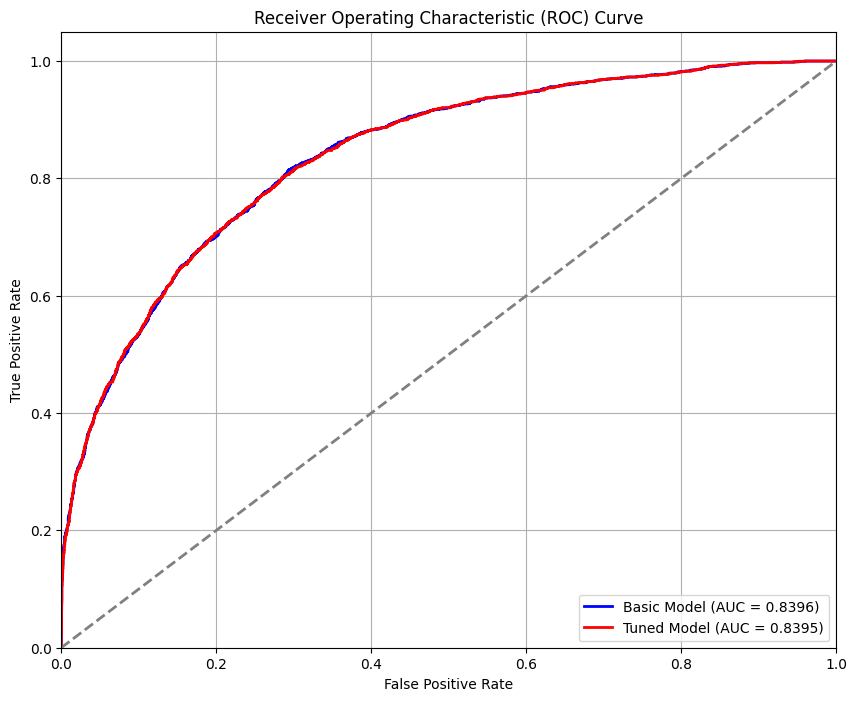

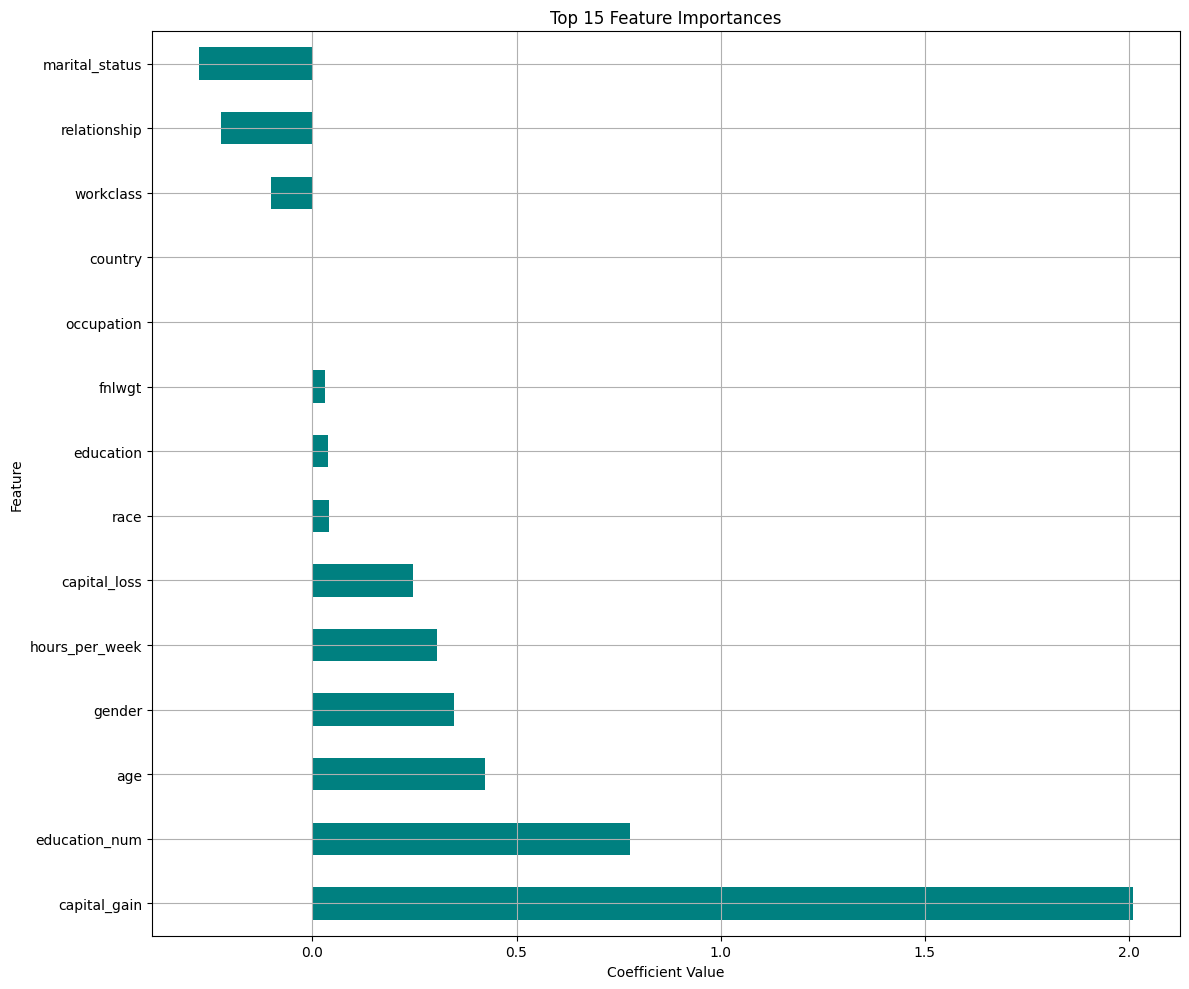

--- Top 10 Most Important Features ---
                Coefficient
capital_gain       2.010733
education_num      0.778517
age                0.423310
gender             0.345641
hours_per_week     0.306154
capital_loss       0.246878
race               0.041873
education          0.037770
fnlwgt             0.029887
occupation         0.000000
--- Bottom 10 Least Important Features ---
                Coefficient
hours_per_week     0.306154
capital_loss       0.246878
race               0.041873
education          0.037770
fnlwgt             0.029887
occupation         0.000000
country            0.000000
workclass         -0.100863
relationship      -0.223970
marital_status    -0.278958
-------------------------------------------------------------------------------------------------------------------------------


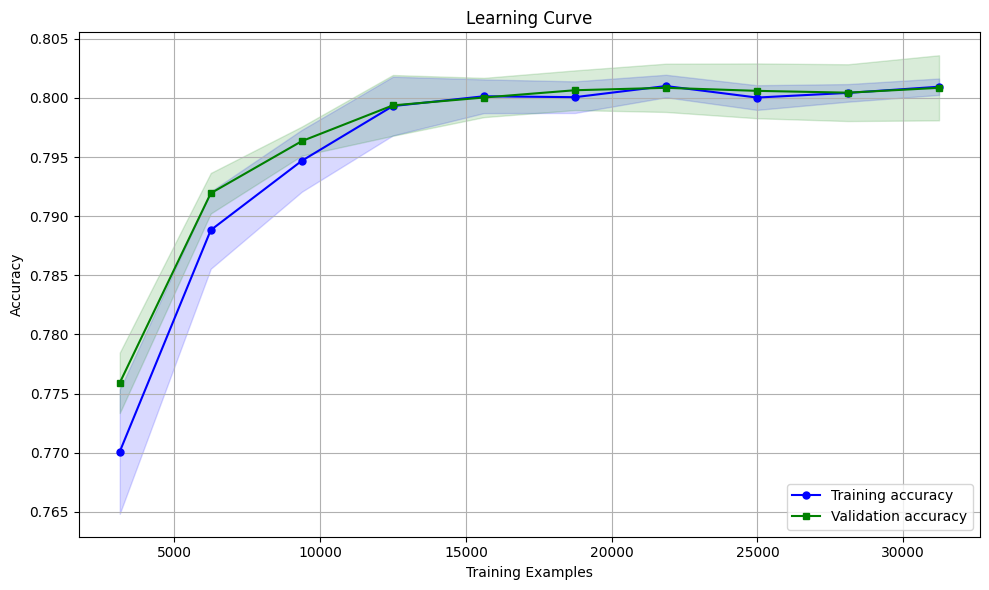

In [79]:
# Logistic Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline

# Set random seed for reproducibility
np.random.seed(42)

# Load the dataset (binary classification)
X = df.drop(columns=['salary'], axis=1)
y = df['salary']

# Print dataset information
print("Dataset shape:", X.shape)
print("Feature names:", X.columns)
print(f"Number of classes: {len(np.unique(y))}")
#print(f"Class distribution: {np.bincount(y)}")
print() 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train shape:", X_train.shape)
print("Y Train shape:", y_train.shape)
print("X Test shape:",  X_test.shape)
print("Y Test shape:",  y_test.shape)
print("-" * 127) 

feature_names = X_train.columns  # or X.columns
target_names = y_train.values # or y.values 

# Basic model with default parameters 
lr = LogisticRegression(max_iter=100000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance ---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train_lr):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_lr)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train_lr)}")
print("-" * 127)  

# Basic model with default parameters using pipeline
# Create a pipeline with preprocessing and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale features
    ('classifier', LogisticRegression(random_state=42, max_iter=100000))  # Logistic regression model
])

pipeline.fit(X_train, y_train)
y_pred_pipeline = pipeline.predict(X_test)
y_pred_train = pipeline.predict(X_train)

# Evaluate the basic model
print("--- Basic Model Performance Using Pipeline---")
print(f"Accuracy test set: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Accuracy train set: {accuracy_score(y_train, y_pred_train):.4f}")
print("\nClassification Report:")
print(f"Classification Report test set:\n {classification_report(y_test, y_pred_pipeline)}\n")
print(f"Classification Report train set:\n {classification_report(y_train, y_pred_train)}")

# Display confusion matrix
print("—- Confusion Matrix: -—")
print(f"Confusion Matrix test set:\n {confusion_matrix(y_test, y_pred_pipeline)}\n")
print(f"Confusion Matrix train set:\n {confusion_matrix(y_train, y_pred_train)}")
print("-" * 127)  

# Hyperparameter tuning with GridSearchCV
print("--- Model With Hyperparameter Tuning ---")
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter
    'classifier__penalty': ['l1', 'l2'],             # Regularization type
    'classifier__solver': ['liblinear', 'saga'],     # Algorithm to use
    'classifier__max_iter': [10000, 50000, 100000],  # Max iterations
    'classifier__class_weight': [None, 'balanced']   # Class weighting
}

# Create grid search with cross-validation
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}\n")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")
print("-" * 127)  

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
y_pred_tuned_train = best_model.predict(X_train)
y_prob_tuned = best_model.predict_proba(X_test)[:, 1]

print("--- Tuned Model Performance ---")
print(f"Accuracy Tuned Test: {accuracy_score(y_test, y_pred_tuned):.4f}")
print(f"Accuracy Tuned Train: {accuracy_score(y_train, y_pred_tuned_train):.4f}\n")
print("Classification Report:\n")
print(classification_report(y_test, y_pred_tuned),'\n')
print(classification_report(y_train, y_pred_tuned_train))
print("-" * 127)   

# Compare basic and tuned models
print("--- Model Comparison ---")
print(f"Basic Model Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Basic Model Accuracy Pipeline: {accuracy_score(y_test, y_pred_pipeline):.4f}")
print(f"Tuned Model Accuracy GridSearch: {accuracy_score(y_test, y_pred_tuned):.4f}\n")

# Calculate cross-validation scores for both models
cv_scores_basic_lr = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
cv_scores_basic_pipe = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
cv_scores_tuned_grid = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

print(f"Basic Model Logistic Regression Cross-Validation Scores: {cv_scores_basic_lr}")
print(f"Basic Model Pipeline Cross-Validation Scores: {cv_scores_basic_pipe}")
print(f"Tuned Model GrdiSearch Cross-Validation Scores: {cv_scores_tuned_grid}\n")

print(f"Basic Model Average CV Score LR:   {cv_scores_basic_lr.mean():.4f} ± {cv_scores_basic_lr.std():.4f}")
print(f"Basic Model Average CV Score Pipe: {cv_scores_basic_pipe.mean():.4f} ± {cv_scores_basic_pipe.std():.4f}")
print(f"Tuned Model Average CV Score Grid: {cv_scores_tuned_grid.mean():.4f} ± {cv_scores_tuned_grid.std():.4f}")
print("-" * 127)  

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Calculate ROC curve for basic model using pipeline 
y_prob_basic = pipeline.predict_proba(X_test)[:, 1]
fpr_basic, tpr_basic, _ = roc_curve(y_test, y_prob_basic)
roc_auc_basic = auc(fpr_basic, tpr_basic)

# Calculate ROC curve for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plot both curves
plt.plot(fpr_basic, tpr_basic, color='blue', lw=2, label=f'Basic Model (AUC = {roc_auc_basic:.4f})')
plt.plot(fpr_tuned, tpr_tuned, color='red', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('roc_curve_comparison.png')
#plt.close() 
plt.show()

# Feature importance
final_model = best_model.named_steps['classifier']
if hasattr(final_model, 'coef_'):
    # Get feature importances (coefficients)
    importances = pd.DataFrame(
        final_model.coef_[0],
        index=X_train.columns,
        columns=['Coefficient']
    ).sort_values('Coefficient', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(12, 10))
    top_features = importances.head(15)
    top_features['Coefficient'].plot(kind='barh', color='teal')
    plt.title('Top 15 Feature Importances')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.grid(True)
    plt.tight_layout()
    #plt.savefig('feature_importance.png')
    #plt.close()
    plt.show()
    
    print("--- Top 10 Most Important Features ---")
    print(importances.head(10))
    print("--- Bottom 10 Least Important Features ---")
    print(importances.tail(10))
    print("-" * 127)  

# Learning curve
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.tight_layout()
#plt.savefig('learning_curve.png')
#plt.close()
plt.show()